# 1
# 2
# 3
# 4

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from scipy import stats
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 20, 12
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 8.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = True

In [2]:
#importando o dataset e transformando em lista
data = pd.read_csv('./Dados-medicos.txt', sep=" ")
data.head()

,IDADE_(anos),Peso_(kg),Carga_Final,VO2_medido_máximo_(mL/kg/min)
0,49,79.1,250.0,49.051833
1,30,52.4,177.0,41.603053
2,56,65.8,140.0,32.674772
3,29,78.0,400.0,59.102564
4,49,69.2,242.0,48.410405


In [3]:
#Declarando Variáveis
X1 = np.array(data['Carga_Final'])
X2 = np.array(data['Peso_(kg)'])
X3 = np.array(data['IDADE_(anos)'])
Y = np.array(data['VO2_medido_máximo_(mL/kg/min)'])


import random
#sorteando os indices de treinamento e test
index = random.sample(range(len(X1)), len(X1))
index_train = index[:1000]
index_test = index[1000:]

#X e Y de treinamento e teste
X1_train = [X1[i] for i in index_train]
X2_train = [X2[i] for i in index_train]
X3_train = [X3[i] for i in index_train]
Y_train = [Y[i] for i in index_train]

X1_test = [X1[i] for i in index_test]
X2_test = [X2[i] for i in index_test]
X3_test = [X3[i] for i in index_test]
Y_test = [Y[i] for i in index_test]

# Questão 5

## Item 1

* Explique, em linhas gerais, os passos feitos para encontrar a solução do modelo incluindo as suas escolhas para usar o algoritmo EM.

    - Resp: Os parâmetros são inicializados de maneira aleatória, de forma a evitar mínimos locais. Em seguida os parâmetros de média e covariância são atualizados para cada cluster como já informados nos itens 2.3 e 4.2 dessa lista. A aleatoriedade na inicialização pode ser percebida na diferença no número de iterações até a convergência do Log-Likelihood do GMM. (Obs: No caso foi adotado uma tolerância de $10^{-4}$).

In [4]:
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.colors as colors
colors_list = list(colors._colors_full_map.values())

class GMM:
    def __init__(self,X,number_of_sources,iterations):
        self.iterations = iterations
        self.number_of_sources = number_of_sources
        self.X = X
        self.mu = None
        self.pi = None
        self.cov = None
        self.XY = None
        
    
    """Define a function which runs for iterations, iterations"""
    def run(self, plot):
        self.reg_cov = 1e-6*np.identity(len(self.X[0]))
        x,y = np.meshgrid(np.sort(self.X[:,0]),np.sort(self.X[:,1]))
        self.XY = np.array([x.flatten(),y.flatten()]).T
           
                    
        """ 1. Set the initial mu, covariance and pi values"""
        self.mu = np.random.randint(min(self.X[:,0]),max(self.X[:,1]),size=(self.number_of_sources,len(self.X[0]))) # This is a nxm matrix since we assume n sources (n Gaussians) where each has m dimensions
        self.cov = np.zeros((self.number_of_sources,len(X[0]),len(X[0]))) # We need a nxmxm covariance matrix for each source since we have m features --> We create symmetric covariance matrices with ones on the digonal
        for dim in range(len(self.cov)):
            np.fill_diagonal(self.cov[dim],1000)
        self.pi = np.ones(self.number_of_sources)/self.number_of_sources # Are "Fractions"
        log_likelihoods = [] # In this list we store the log likehoods per iteration and plot them in the end to check if
                             # if we have converged
          
        
        
        
        """Plot the initial state"""  
        """
        fig = plt.figure(figsize=(10,10))
        
        #2d
        #ax0 = fig.add_subplot(111)
        #ax0.scatter(self.X[:,0],self.X[:,1])
        
        #3d
        ax0 = fig.add_subplot(111, projection='3d')
        ax0.scatter(self.X[:,0],self.X[:,1],self.X[:,2])
        
        ax0.set_title('Initial state')
        for m,c in zip(self.mu,self.cov):
            c += self.reg_cov
            multi_normal = multivariate_normal(mean=m,cov=c)
            #ax0.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
            #ax0.scatter(m[0],m[1],c='grey',zorder=10,s=100)
        """


        plt.show()
        
        
        
        tol = 10**(-4)
        dif_log=1
        while dif_log > tol:
        #for i in range(self.iterations):  
            """E Step"""
            r_ic = np.zeros((len(self.X),len(self.cov)))
            

            for m,co,p,r in zip(self.mu,self.cov,self.pi,range(len(r_ic[0]))):
                co+=self.reg_cov
                mn = multivariate_normal(mean=m,cov=co)
         
                
                r_ic[:,r] =  p*mn.pdf(self.X)/np.sum([pi_c*multivariate_normal(mean=mu_c,cov=cov_c).pdf(X) for pi_c,mu_c,cov_c in zip(self.pi,self.mu,self.cov+self.reg_cov)],axis=0)

            
            """
            The above calculation of r_ic is not that obvious why I want to quickly derive what we have done above.
            First of all the nominator:
            We calculate for each source c which is defined by m,co and p for every instance x_i, the multivariate_normal.pdf() value.
            For each loop this gives us a 100x1 matrix (This value divided by the denominator is then assigned to r_ic[:,r] which is in 
            the end a 100x3 matrix).
            Second the denominator:
            What we do here is, we calculate the multivariate_normal.pdf() for every instance x_i for every source c which is defined by
            pi_c, mu_c, and cov_c and write this into a list. This gives us a 3x100 matrix where we have 100 entrances per source c.
            Now the formula wants us to add up the pdf() values given by the 3 sources for each x_i. Hence we sum up this list over axis=0.
            This gives us then a list with 100 entries.
            What we have now is FOR EACH LOOP a list with 100 entries in the nominator and a list with 100 entries in the denominator
            where each element is the pdf per class c for each instance x_i (nominator) respectively the summed pdf's of classes c for each 
            instance x_i. Consequently we can now divide the nominator by the denominator and have as result a list with 100 elements which we
            can then assign to r_ic[:,r] --> One row r per source c. In the end after we have done this for all three sources (three loops)
            and run from r==0 to r==2 we get a matrix with dimensionallity 100x3 which is exactly what we want.
            If we check the entries of r_ic we see that there mostly one element which is much larger than the other two. This is because
            every instance x_i is much closer to one of the three gaussians (that is, much more likely to come from this gaussian) than
            it is to the other two. That is practically speaing, r_ic gives us the fraction of the probability that x_i belongs to class
            c over the probability that x_i belonges to any of the classes c (Probability that x_i occurs given the 3 Gaussians).
            """
            """M Step"""
            
            
            # Calculate the new mean vector and new covariance matrices, based on the probable membership of the single x_i to classes c --> r_ic
            self.mu = []
            self.cov = []
            self.pi = []
            log_likelihood = []
            for c in range(len(r_ic[0])):
                m_c = np.sum(r_ic[:,c],axis=0)
                mu_c = (1/m_c)*np.sum(self.X*r_ic[:,c].reshape(len(self.X),1),axis=0)
                self.mu.append(mu_c)
                # Calculate the covariance matrix per source based on the new mean
                self.cov.append(((1/m_c)*np.dot((np.array(r_ic[:,c]).reshape(len(self.X),1)*(self.X-mu_c)).T,(self.X-mu_c)))+self.reg_cov)
                # Calculate pi_new which is the "fraction of points" respectively the fraction of the probability assigned to each source 
                self.pi.append(m_c/np.sum(r_ic)) # Here np.sum(r_ic) gives as result the number of instances. This is logical since we know 
                                                # that the columns of each row of r_ic adds up to 1. Since we add up all elements, we sum up all
                                                # columns per row which gives 1 and then all rows which gives then the number of instances (rows) 
                                                # in X --> Since pi_new contains the fractions of datapoints, assigned to the sources c,
                                                # The elements in pi_new must add up to 1
            
            
            """Log likelihood"""
            log_likelihoods.append(np.log(np.sum([k*multivariate_normal(self.mu[i],self.cov[j]).pdf(X) for k,i,j in zip(self.pi,range(len(self.mu)),range(len(self.cov)))])))
            
            if(len(log_likelihoods)>=2):
                dif_log = log_likelihoods[-1] - log_likelihoods[-2]
            """
            This process of E step followed by a M step is now iterated a number of n times. In the second step for instance,
            we use the calculated pi_new, mu_new and cov_new to calculate the new r_ic which are then used in the second M step
            to calculat the mu_new2 and cov_new2 and so on....
            """
        #"""
        if plot == True:
            figuresize = 3
            titlefontsize = 8
            titleweight = 'bold'
            fig2 = plt.figure(figsize = (3*figuresize, figuresize))
            #fig2 = plt.figure(figsize=(3,3))

            #ax1 = fig2.add_subplot(1,3,self.number_of_sources-1)
            ax1 = fig2.add_subplot(111) 

            ax1.set_title('Log-Likelihood - {} Clusters'.format(self.number_of_sources))
            #print(range(0,len(log_likelihoods),1), log_likelihoods)
            ax1.plot(range(0,len(log_likelihoods),1),log_likelihoods)
            plt.tight_layout()
            plt.show()
        #"""
        
        return self.mu, self.cov

    
    """Predict the membership of an unseen, new datapoint"""
    def predict(self,Y):

        # PLot the point onto the fittet gaussians
        #"""

        fig3 = plt.figure(figsize=(9,6))
        #ax2 = fig3.add_subplot(111)
        #ax2.scatter(self.X[:,0],self.X[:,1])
        
        #3d
        ax2 = fig3.add_subplot(1,1,1, projection='3d')
        #ax2.scatter(self.X[:,0],self.X[:,1],self.X[:,2])
        
        for m,c in zip(self.mu,self.cov):
            #multi_normal = multivariate_normal(mean=m,cov=c)
            #ax2.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
            #ax2.scatter(m[0],m[1], m[2],c='grey', s=100)#,zorder=10,s=100)
            ax2.set_title('GMM - {} Clusters'.format(self.number_of_sources))
            
            prediction_list = []
            for y in Y:
                prediction = []        
                for m,c in zip(self.mu,self.cov):  
                    #print(c)
                    prediction.append(multivariate_normal(mean=m,cov=c).pdf(y)/np.sum([multivariate_normal(mean=mean,cov=cov).pdf(y) for mean,cov in zip(self.mu,self.cov)]))
                    color_index = ind = np.argmax(prediction)*100+10
                    ax2.scatter(y[0],y[1],y[2],c=colors_list[color_index], s=70)#,zorder=10,s=100)
                prediction_list.append(prediction)
        
        
        ax2.set_xlabel('Carga')
        ax2.set_zlabel('VO2')
        ax2.set_ylabel('Peso')
        plt.tight_layout()
        plt.show()
        #"""
        return prediction_list


#dados treinamento
X_train = np.array([X1_train[:],X2_train[:], Y_train[:]])
X=X_train.T

#dados teste - se quiser trocar a disposicao dos eixos basta trocar a ordem 
#precisa trocar no treinamento tbm
X_test = np.array([X1_test[:],X2_test[:], Y_test[:]])
XT=X_test.T

#"""
#plotando 2 até 4 gaussianas (i)
media_cluster = []

for i in range(2,5):
    GMM3 = GMM(X,i,30)     
    media, covar = GMM3.run(plot=True)
    media_cluster.append(media)
    #Pi = GMM3.predict(XT)
    #print('Média: (Carga|Peso|Idade|VO2_Max) \n{}, \n\nMatriz Covariância: \n'.format(media))
#print("Pi: \n", Pi)
#"""

FileNotFoundError: [WinError 2] O sistema não pode encontrar o arquivo especificado

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x00000223DE876A60> (for post_execute):


FileNotFoundError: [WinError 2] O sistema não pode encontrar o arquivo especificado

FileNotFoundError: [WinError 2] O sistema não pode encontrar o arquivo especificado

FileNotFoundError: [WinError 2] O sistema não pode encontrar o arquivo especificado

## Item 2
* A partir do modelo obtido, explique como o algoritmo pode agrupar as amostras. É parte da solução explicar como você vai classificar cada amostra xi a partir do modelo obtido. Os agrupamentos obtidos fazem algum sentido?

    - Resp: Os agrupamentos são formados em um formato de elipsóide, e as amostras ($x_i$) são classificadas em um dos k-clusters de acordo com a equação (1) que mostra um exemplo para duas gaussianas. A amostra será classificada de acordo com o cluster de maior "resposabilidade" ($w_{ik}$). Podendo ser visto na figura abaixo.
    
    
$$ w_{ik} = \frac{\alpha_1 p(x_i | z_k, \mu_k, \Sigma_k)}{\alpha_1 p(x_i | z_1, \mu_1, \Sigma_1) + \alpha_2 p(x_i | z_2, \mu_2, \Sigma_2)}$$

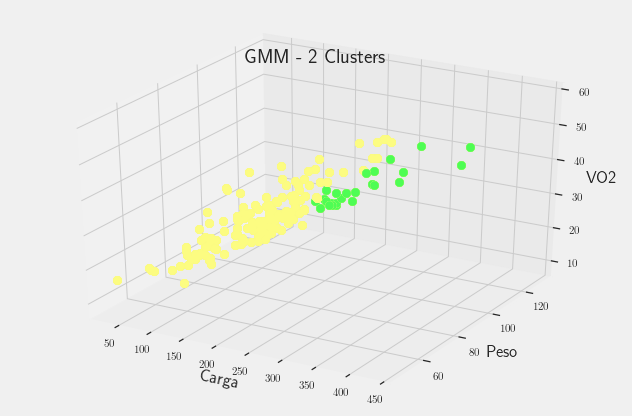

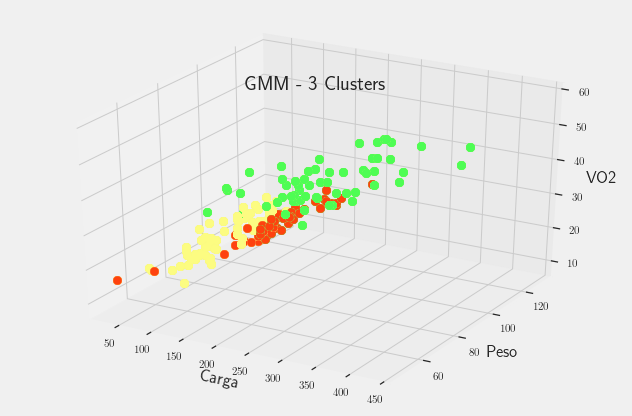

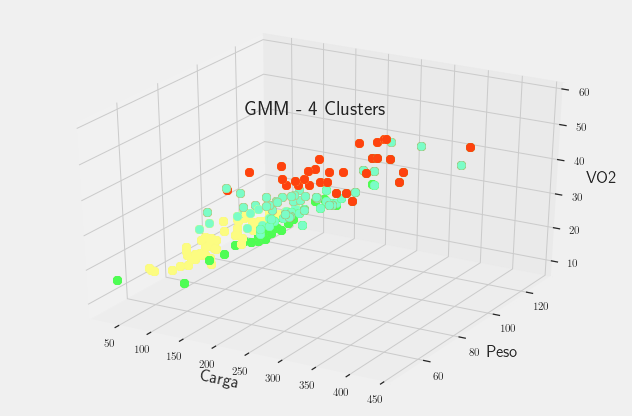

In [92]:
#plotando 2 até 4 gaussianas (i)
media_cluster = []
for i in range(2,5):
    GMM3 = GMM(X,i,30)     
    media, covar = GMM3.run(plot=False)
    #media_cluster.append(media)
    Pi = GMM3.predict(XT)
    #print('Média: (Carga|Peso|Idade|VO2_Max) \n{}, \n\nMatriz Covariância: \n'.format(media))
#print("Pi: \n", Pi)


- Para os **modelos com 2 e 3 Classes**, podemos ver uma **correlação positiva entre as médias Carga e VO2**, fato já confirmado no modelo de regressao linear. Já no modelo com **4 Classes**, percebemos **2 clusters muito semelhantes** (Cluster 1 e 2). Observamos também que a **variável Peso** adiciona pouca informação ao modelo, uma vez que confirmamos que há **baixa correlação (ver tabela abaixo)** entre essa variável com as demais.

In [51]:
for i in range(0,3):
    print('Modelo com {} Classes'.format(i+2))
    for cluster in range(len(media_cluster[i])):
        print('Médias Cluster {}: Carga: {:.0f},  Peso: {:.0f}, VO2_Max: {:.0f}'.format(cluster+1, media_cluster[i][cluster][0],media_cluster[i][cluster][1],media_cluster[i][cluster][2]))
    print("")
data.iloc[:, 1:4].corr()

Modelo com 2 Clusters
Médias Cluster 1: Carga: 197,  Peso: 84, VO2_Max: 34
Médias Cluster 2: Carga: 120,  Peso: 91, VO2_Max: 20

Modelo com 3 Clusters
Médias Cluster 1: Carga: 133,  Peso: 100, VO2_Max: 20
Médias Cluster 2: Carga: 116,  Peso: 77, VO2_Max: 23
Médias Cluster 3: Carga: 211,  Peso: 87, VO2_Max: 35

Modelo com 4 Clusters
Médias Cluster 1: Carga: 171,  Peso: 107, VO2_Max: 24
Médias Cluster 2: Carga: 170,  Peso: 83, VO2_Max: 30
Médias Cluster 3: Carga: 75,  Peso: 80, VO2_Max: 16
Médias Cluster 4: Carga: 262,  Peso: 85, VO2_Max: 43



,Peso_(kg),Carga_Final,VO2_medido_máximo_(mL/kg/min)
Peso_(kg),1.000000,0.186422,-0.174401
Carga_Final,0.186422,1.000000,0.878326
VO2_medido_máximo_(mL/kg/min),-0.174401,0.878326,1.000000


# Questão 6

In [239]:
from sklearn.linear_model import LinearRegression

categorias =  [(18,30), (30,40), (40,50), (50,60), (60,70), (70,100)]
categorias_train = [[ind for cat, ind  in zip(categorias, range(len(categorias))) if (idade>=cat[0] and idade<cat[1])] for idade in X3_train]
categorias_test = [[ind for cat, ind  in zip(categorias, range(len(categorias))) if (idade>=cat[0] and idade<cat[1])] for idade in X3_test]
categorias_train = np.array(categorias_train).ravel()
categorias_test = np.array(categorias_test).ravel()

#dados treinamento
X_train = np.array([X1_train[:],X2_train[:], X3_train])
X=X_train.T

#dados teste - se quiser trocar a disposicao dos eixos basta trocar a ordem 
#precisa trocar no treinamento tbm
X_test = np.array([X1_test[:],X2_test[:], X3_test[:]])
XT=X_test.T

regr = LinearRegression() # cria o modelo
regr.fit(X, Y_train) # treina o modelo


print (regr.intercept_)
print (regr.coef_)
print ('Accuracy : {}'.format(regr.score(XT, Y_test)))



np.mean([regr.predict([x]) - y for x,y in zip(XT,Y_test)]) 



29.435269402111533
[ 0.13546435 -0.24682831 -0.04038519]
Accuracy : 0.8926718084581978


0.1097652766564909

In [250]:
#dados treinamento
X_train = np.array([X1_train[:],X2_train[:], X3_train, Y_train[:]])
X=X_train.T

#dados teste - se quiser trocar a disposicao dos eixos basta trocar a ordem 
#precisa trocar no treinamento tbm
X_test = np.array([X1_test[:],X2_test[:], X3_test[:], Y_test[:]])
XT=X_test.T
    
GMM1 = GMM(X,1,30) 
media, covar = GMM1.run(plot=False)
#Pi = GMM.predict_cluster([[250,80, 50]]) #carga/peso/vo2 =>(Pr(Cluster))

print(media)

[array([172.99269892,  86.35820994,  52.88000024,  29.41839296])]


In [270]:

def estimator(X):

    Y = np.array(data['VO2_medido_máximo_(mL/kg/min)'])
    y_samples = np.linspace(min(Y), max(Y), 1000)

    for m,c in zip(media, covar): 
        Z=[]
        for y in y_samples:
            Y=X[:]
            Y.append(y)
            Z.append( [multivariate_normal(mean=m, cov=c).pdf(Y), y])
            
    #print(multivariate_normal(mean=m, cov=c).rvs(1))
    #print(multivariate_normal(mean=m, cov=c ).rvs(size= 1, random_state= 0))
    return Z

X_list = [[X1_test[i], X2_test[i], X3_test[i]] for i in range(len(X1_test))]

x_axis, y_axis = [],[]
for x in X_list[:4]:
    prob_VO2 = estimator(x)

for p in prob_VO2:
    x_axis.append(p[1])
    y_axis.append(p[0])


plt.scatter(x_axis, y_axis)
plt.show()

KeyboardInterrupt: 

In [ ]:
sum(y_axis)

In [275]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture



n_samples = 300

# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])





# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

ValueError: Expected the input data X have 3 features, but got 2 features

In [286]:
#dados treinamento
X_train = np.array([X1_train[:],X2_train[:], X3_train])
X=X_train.T

#dados teste - se quiser trocar a disposicao dos eixos basta trocar a ordem 
#precisa trocar no treinamento tbm
X_test = np.array([X1_test[:],X2_test[:], X3_test[:]])
XT=X_test.T

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=3, covariance_type='full')
clf.fit(X)


array([0])

In [301]:
clf.score_samples(XT)

array([-12.50879764, -12.85588127, -12.2033571 , -12.3328709 ,
       -11.95388755, -14.22340996, -13.51302846, -14.78966288,
       -12.8340017 , -15.06952672, -11.70830562, -15.29052949,
       -15.55370581, -12.31301385, -12.32758502, -11.98933785,
       -13.31468947, -14.14180363, -14.32343776, -12.66653707,
       -12.41920567, -14.16391998, -13.18512287, -14.92987813,
       -12.45391169, -14.51654706, -12.14415817, -11.85352594,
       -15.28584658, -12.30180932, -12.9059349 , -13.60781793,
       -18.0445837 , -13.1807017 , -14.82178943, -12.53477687,
       -13.35560729, -13.60212851, -16.24121393, -11.71500345,
       -12.76895725, -12.83301298, -14.9629073 , -11.78020704,
       -13.6821341 , -12.54524845, -15.05328074, -12.25145859,
       -12.51414511, -12.96761354, -13.73938616, -12.338569  ,
       -13.27114128, -12.20407293, -14.0741581 , -13.68855885,
       -12.57828334, -12.96329617, -11.76968002, -13.10407715,
       -12.90907397, -13.32230596, -12.53463927, -12.30

# Questão 7

## Item 1
* K=3 clusters

In [5]:
from sklearn.cluster import KMeans
def k_means(X, num_clusters):
    kmeans = KMeans(n_clusters = num_clusters, init = 'random')
    kmeans.fit(X)
    distance = kmeans.fit_transform(X)
    labels = kmeans.labels_
    kmeans.cluster_centers_
    return labels

In [6]:
from matplotlib.legend import Legend
def categories_frequency(categorias, X3, num_clusters, labels):
        
        #setup grafico
        faixa_etaria = [cat[0] for cat in categorias]
        cat_list = [cat for cat in categorias  for idade in X3 if (idade>=cat[0] and idade<cat[1])]
        plt.rcParams["scatter.marker"] = "o"
        fig = plt.figure(figsize=(12,6))
        ax = fig.add_subplot(111)
        ax.set_title('Frequencia / Faixa Etaria')
        ax.set_xlabel('Faixa Etaria')
        ax.set_ylabel('Frequencia (perc.)')
        

        #for cat in categorias:
        for cluster in range(num_clusters):
        #for label, idade in zip(labels,X3):
            color_index = cluster*100+10
           
            cluster_cat = []
            for label, idade in zip(labels,X3):
            #for cluster in range(num_clusters):

                if (label == cluster):# and idade>=cat[0] and idade<cat[1]):
                    #cluster_cat.append(cat)
                    cat_ind = [cat for cat in categorias if (idade>=cat[0] and idade<cat[1])]
                    cluster_cat.append(cat_ind[0])
            
            
            fr_list=[]
            for cat in categorias:
                frequency = cluster_cat.count(cat)*100 / len(cluster_cat)
                #frequency = len(cluster_cat)*100 / cat_list.count(cat)
                #print('Cluster {}, Categoria {}, Frequência {:.2f}%'.format(cluster+1, cat, frequency))
                fr_list.append(frequency)
              
            ax.plot(faixa_etaria, fr_list,'-o', c=colors_list[color_index], label = 'Cluster {}: {}'.format(cluster+1, list(labels).count(cluster)))
            leg = ax.legend()
            #print('Total Cluster {}: {}'.format(cluster+1, list(labels).count(cluster)))
            #print("") 
        
        cat_freq = []
        for cat in categorias:
            cat_freq.append(cat_list.count(cat)*100/len(X3))
            #print('Total da Categoria {}: {}'.format(cat, cat_list.count(cat)))   
        
        ax.plot(faixa_etaria, cat_freq,'--x', c="orange", label = 'Prior: {}'.format(len(X3)))
        leg = ax.legend()


        plt.show()

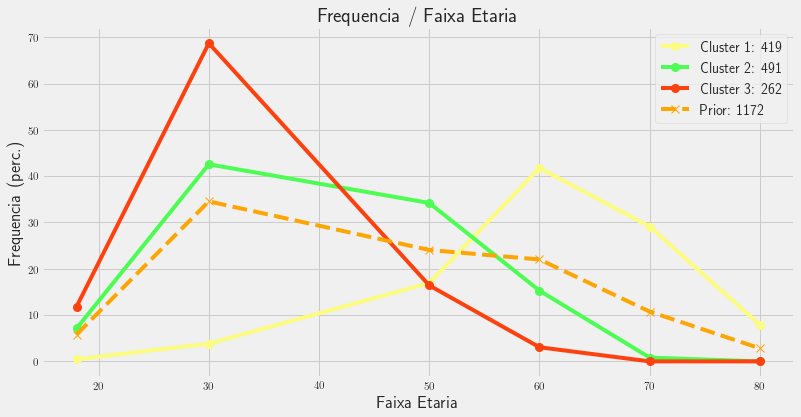

In [7]:
#Rodando pra 3 clusters
X = (np.array([X3[:],X1[:], Y[:]])).T
categorias =  [(18,30), (30,50), (50,60), (60,70), (70,80), (80,100)]
num_clusters = 3

labels = k_means(X, num_clusters)
categories_frequency(categorias, X3, num_clusters, labels)

## Item 2
* K=4 clusters

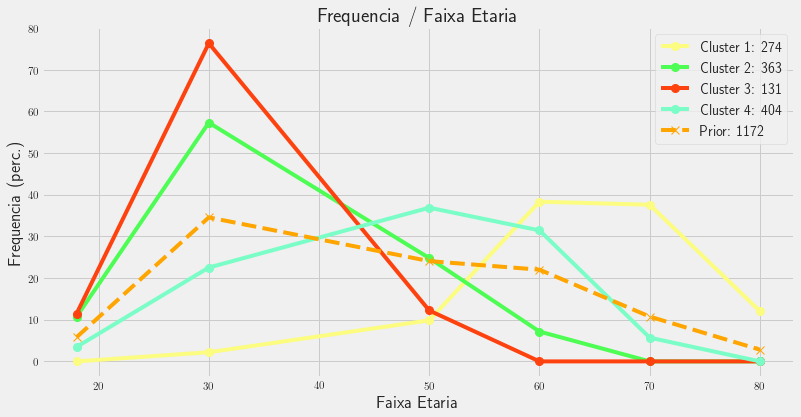

In [8]:
#Rodando pra 4 clusters
num_clusters = 4

labels = k_means(X, num_clusters)
categories_frequency(categorias, X3, num_clusters, labels)

## Item 3
* Tente perceber alguma interpretação para os clusters encontrados, se é que existe alguma.
    - Resp: Analisando o gráfico com 3 clusters (**K=3**), percebemos que os  __Clusters 2 e 3__, possuem um comportamento muito **similar a distribuicão de frequencia dos dados a priori** ou (**K=1**). O que é um indício que houve **pouca influência** da **categoria idade** na classificação.
    
    - Analisando o gráfico com 4 clusters (**K=4**), é possivel perceber que os __Clusters 1, 2 e 4__ são **semelhantes aos 3 clusters do gráfico anterior** (**K=3**), então o cluster adicional (**Cluster 3**), criado no gráfico (K=4), não dá **nenhuma informação adicional** quanto a classificação das faixas etárias.
    
    - Outra interpretação pode ser feita através do **Método Elbow** disposto abaixo mostra a relação da soma das variâncias das amostras para um dado número de clusters, é possível perceber que a **curva se acentua significativamenre quando há 3 clusters**, fomando assim um "cotovelo".

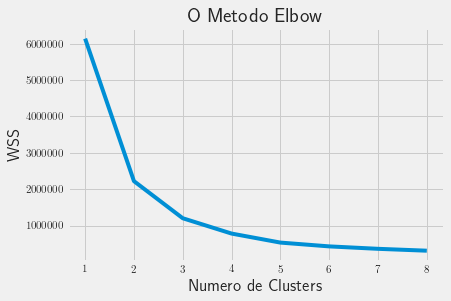

In [9]:
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    #print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 9), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

## Item 4
* Comente os resultados
 - Resp: Verificamos abaixo que o **autovalor associado a idade (0.1167)** é significamente inferior aos outros, o que nos leva a concluir que a **variável idade é a de menor importância** pra explicar a variância dos dados. Além disso, existe uma **correlação significativa** entre as variáveis o que  implica na disposição dos dados em um formato de elipsóide e não circular como é feito no modelo k-means.
 

In [10]:
from numpy import linalg as LA
data2 = data.loc[:, ['Carga_Final', 'IDADE_(anos)', 'VO2_medido_máximo_(mL/kg/min)']]
dt = data2.corr()

eigval, eigvec = LA.eig(dt)
print('autovalores: \n(Carga/Idade/VO2):\n{} \n\nautovetores: \n{}'.format(eigval, eigvec))
print("\nMatrix_Correlação:")
dt

autovalores: 
(Carga/Idade/VO2):
[2.4722955  0.11671209 0.41099241] 

autovetores: 
[[-0.60387607  0.74350987  0.28727471]
 [ 0.53623278  0.11229667  0.83656671]
 [-0.58973561 -0.65922874  0.46650764]]

Matrix_Correlação:


,Carga_Final,IDADE_(anos),VO2_medido_máximo_(mL/kg/min)
Carga_Final,1.000000,-0.692058,0.878326
IDADE_(anos),-0.692058,1.000000,-0.630072
VO2_medido_máximo_(mL/kg/min),0.878326,-0.630072,1.000000


 * OBS: Uma vez que a **correlação** dos dados é **igual a zero**, temos o caso onde $\boldsymbol\Sigma = \boldsymbol \sigma^{2}$. As expressoes _(1) e (2)_ abaixo passam a ser equivalentes e dessa forma a variância da distancia euclidiana das amostras para cada cluster pode ser entendida como uma gaussiana e dispostas em um formato circular, **adequado para um modelo k-means**.
 
    $$\begin{aligned}f_{\mathbf {X} }(x_{1},\ldots ,x_{k})&={\frac {\exp \left(-{\frac {1}{2}}({\mathbf {x} }-{\boldsymbol {\mu }})^{\mathrm {T} }{\boldsymbol {\Sigma }}^{-1}({\mathbf {x} }-{\boldsymbol {\mu }})\right)}{\sqrt {(2\pi )^{k}|{\boldsymbol {\Sigma }}|}}}\end{aligned}$$
 
 
 $${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$$

,Peso_(kg),Carga_Final,VO2_medido_máximo_(mL/kg/min)
Peso_(kg),1.000000,0.186422,-0.174401
Carga_Final,0.186422,1.000000,0.878326
VO2_medido_máximo_(mL/kg/min),-0.174401,0.878326,1.000000
